In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [80]:
df=pd.read_csv('collegePlace.csv')

In [81]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [83]:
df['PlacedOrNot'].unique()

array([1, 0])

In [84]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [85]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [86]:
df['Age'].unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29])

In [87]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

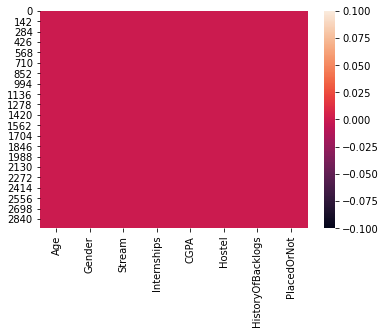

In [88]:
sns.heatmap(df.isnull())

In [89]:
df.groupby('Stream').max()['PlacedOrNot']

Stream
Civil                            1
Computer Science                 1
Electrical                       1
Electronics And Communication    1
Information Technology           1
Mechanical                       1
Name: PlacedOrNot, dtype: int64

In [90]:
Gender=pd.get_dummies(df['Gender'],drop_first=True)

In [91]:
df.drop('Gender',axis=1,inplace=True)

In [92]:
df

,Age,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Electronics And Communication,1,8,1,1,1
1,21,Computer Science,0,7,1,1,1
2,22,Information Technology,1,6,0,0,1
3,21,Information Technology,0,8,0,1,1
4,22,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...
2961,23,Information Technology,0,7,0,0,0
2962,23,Mechanical,1,7,1,0,0
2963,22,Information Technology,1,7,0,0,0
2964,22,Computer Science,1,7,0,0,0


In [93]:
df=pd.concat([df,Gender],axis=1)

In [94]:
df

,Age,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Male
0,22,Electronics And Communication,1,8,1,1,1,1
1,21,Computer Science,0,7,1,1,1,0
2,22,Information Technology,1,6,0,0,1,0
3,21,Information Technology,0,8,0,1,1,1
4,22,Mechanical,0,8,1,0,1,1
...,...,...,...,...,...,...,...,...
2961,23,Information Technology,0,7,0,0,0,1
2962,23,Mechanical,1,7,1,0,0,1
2963,22,Information Technology,1,7,0,0,0,1
2964,22,Computer Science,1,7,0,0,0,1


In [95]:
le = LabelEncoder()

In [96]:
le.fit(df['Stream'])

LabelEncoder()

In [97]:
list(le.classes_)

['Civil',
 'Computer Science',
 'Electrical',
 'Electronics And Communication',
 'Information Technology',
 'Mechanical']

In [98]:
df['Stream Labels'] = le.transform(df['Stream'])

In [99]:
df

,Age,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Male,Stream Labels
0,22,Electronics And Communication,1,8,1,1,1,1,3
1,21,Computer Science,0,7,1,1,1,0,1
2,22,Information Technology,1,6,0,0,1,0,4
3,21,Information Technology,0,8,0,1,1,1,4
4,22,Mechanical,0,8,1,0,1,1,5
...,...,...,...,...,...,...,...,...,...
2961,23,Information Technology,0,7,0,0,0,1,4
2962,23,Mechanical,1,7,1,0,0,1,5
2963,22,Information Technology,1,7,0,0,0,1,4
2964,22,Computer Science,1,7,0,0,0,1,1


In [100]:
df.eq(0).sum()

Age                     0
Stream                  0
Internships          1331
CGPA                    0
Hostel               2168
HistoryOfBacklogs    2396
PlacedOrNot          1327
Male                  491
Stream Labels         317
dtype: int64

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X=df[['Age','Internships','CGPA','Hostel','HistoryOfBacklogs','Male','Stream Labels']]

In [103]:
Y=df['PlacedOrNot']

In [104]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33)

In [105]:
x_train

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Male,Stream Labels
2592,21,1,7,1,0,1,5
2595,20,1,7,0,1,1,4
1743,22,1,6,0,1,1,2
2876,23,0,8,1,1,1,5
926,21,1,6,1,0,0,5
...,...,...,...,...,...,...,...
1663,20,1,8,0,0,1,4
2320,20,0,8,0,1,1,3
292,22,2,6,1,1,0,1
505,21,3,8,1,0,1,4


In [106]:
x_test

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Male,Stream Labels
2552,21,1,6,0,0,1,0
1588,23,0,5,0,1,1,4
399,21,0,6,0,1,1,4
2235,19,0,8,1,1,1,5
1871,20,0,7,0,0,1,4
...,...,...,...,...,...,...,...
1429,21,0,8,0,0,1,2
526,22,1,7,0,0,1,2
1288,21,1,8,0,0,1,4
1427,22,0,7,0,0,1,3


In [107]:
y_train

2592    0
2595    0
1743    0
2876    1
926     0
       ..
1663    1
2320    1
292     0
505     1
1773    0
Name: PlacedOrNot, Length: 1987, dtype: int64

In [108]:
y_test

2552    0
1588    0
399     0
2235    1
1871    0
       ..
1429    1
526     0
1288    1
1427    0
1459    0
Name: PlacedOrNot, Length: 979, dtype: int64

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lr=LogisticRegression()

In [111]:
lr.fit(x_train,y_train)

LogisticRegression()

In [112]:
x_test.iloc[0]

Age                  21
Internships           1
CGPA                  6
Hostel                0
HistoryOfBacklogs     0
Male                  1
Stream Labels         0
Name: 2552, dtype: int64

In [113]:
y_test.iloc[0]

0

In [114]:
lr.predict([[23,0,7,0,0,0,4]])

array([1])

In [115]:
predictions=lr.predict(x_test)

In [116]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

# accuracy


In [117]:
from sklearn import metrics

In [118]:
metrics.confusion_matrix(y_test,predictions)

array([[328, 105],
       [120, 426]])

In [119]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       433
           1       0.80      0.78      0.79       546

    accuracy                           0.77       979
   macro avg       0.77      0.77      0.77       979
weighted avg       0.77      0.77      0.77       979



# using knn

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn=KNeighborsClassifier(n_neighbors=11)

In [122]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [123]:
prediction=knn.predict(x_test)

In [124]:
from sklearn.metrics import classification_report

In [125]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       433
           1       0.80      0.78      0.79       546

    accuracy                           0.77       979
   macro avg       0.77      0.77      0.77       979
weighted avg       0.77      0.77      0.77       979



In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
df.shape

(2966, 9)

In [128]:
2966/5

593.2

In [129]:
593.2*4

2372.8

In [130]:
ks=list(range(1,500,2))

In [131]:
cvscore=[]

In [132]:
for k in ks:
    testknn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(testknn,X,Y,cv=5,scoring='accuracy').mean()
    cvscore.append(score)

In [ ]:
max(cvscore)

0.8547015971973814

In [ ]:
cvscore.index(max(cvscore))

12

In [ ]:
ks[12]

25

In [ ]:
cvscore

[0.8139001027702545,
 0.8273766331101914,
 0.8439027713901238,
 0.8465980774581112,
 0.8466014842068805,
 0.8472805627948967,
 0.8482906638049977,
 0.8432344808398771,
 0.8479568024256052,
 0.8499781400287301,
 0.8496431430664145,
 0.8509916477876006,
 0.8547015971973814,
 0.8533547958505799,
 0.8530197988882644,
 0.8530209344711874,
 0.8533542280591183,
 0.8536909283958188,
 0.8509944867449084,
 0.8496420074834916,
 0.8489714457673985,
 0.847283969543666,
 0.847622373254751,
 0.8466088654958807,
 0.8469432946667348,
 0.8479573702170666,
 0.8479573702170666,
 0.8459371681968648,
 0.8452609285661563,
 0.8418933574076913,
 0.8432384553801079,
 0.8439141272193549,
 0.8449264993953023,
 0.8462750041164881,
 0.8415532503222216,
 0.8378438687039024,
 0.8391918056336267,
 0.8385178371687647,
 0.8375054649928174,
 0.837168764656117,
 0.8364942283997934,
 0.832788821321705,
 0.8327899569046281,
 0.8364964995656395,
 0.8371704680305017,
 0.8391918056336269,
 0.836834335485263,
 0.832112013899534

In [ ]:
finalknn=KNeighborsClassifier(n_neighbors=25)
finalknn.fit(X,Y)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
import pickle 

In [ ]:
pickle.dump(le, open('Stream Encoder.pkl', 'wb'))

In [ ]:
pickle.dump(finalknn,open('KNNmodel.pkl','wb'))

In [ ]:
loadedmodel=pickle.load(open('KNNmodel.pkl','rb'))

In [ ]:
X.columns

Index(['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'Male',
       'Stream Labels'],
      dtype='object')

In [ ]:
loadedmodel.predict([[22,0,6,1,0,1,5]])

array([0])

In [ ]:
loadedEncoder = pickle.load(open('Stream Encoder.pkl', 'rb'))
loadedEncoder

LabelEncoder()

In [ ]:
loadedEncoder.transform(['Civil'])

array([0])

In [ ]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [ ]:
loadedEncoder.transform(['Mechanical'])[0]

5